# # Here is my analysis of this data:

Analysis point #1 - the urban area is where the business is.....
Point #2 - if you wanna make the big bucks on the ride fares side, you probably are better off out in the boonies, since the
average ride fare is higher when you're out in the middle of nowhere, as opposed to the numerous, shorter trips in the urban areas.
Point #3, Suburbs are terrible in general, but if you're a driver there, you're probalby doing pretty well since they make up a disproprtionately large portion of the revenue with a lower driver count...aka less competition, higher fares than the urban drivers, so that's the spot to be I think 

In [1]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import matplotlib.patches as mpatches



#Put in the paths to the csv files with the data
city_data_to_load = "data/city_data.csv"
ride_data_to_load = "data/ride_data.csv"

# Read the City and Ride Data and grab a little information about the size of these things
#nThis way I can figure out the most logical way to merge em
city_data = pd.read_csv(city_data_to_load)
list_of_city_column_headers = list(city_data.columns.values)
print(list_of_city_column_headers)
print(city_data.shape)

ride_data = pd.read_csv(ride_data_to_load)
list_of_ride_column_headers = list(ride_data.columns.values)
print(list_of_ride_column_headers)
print(ride_data.shape)

# Combine the data into a single dataset
# Let's see if there are duplicate cities in the ride dataset first

print(ride_data.city.nunique())
print(city_data.city.nunique())

#There totally are dupes, but..... there aren't dupes in the city_dataset, so we'll have some
#redundant info in driver_count and type but whatever, i don't think that that's necessarily the worst thing ever
#of all time

merged_df = pd.merge(ride_data, city_data, on="city", how="outer")

# Display the data table for preview
merged_df.head()

['city', 'driver_count', 'type']
(120, 3)
['city', 'date', 'fare', 'ride_id']
(2375, 4)
120
120


,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873,5,Urban
1,Lake Jonathanshire,2018-04-07 20:51:11,31.25,4441251834598,5,Urban
2,Lake Jonathanshire,2018-03-09 23:45:55,19.89,2389495660448,5,Urban
3,Lake Jonathanshire,2018-04-07 18:09:21,24.28,7796805191168,5,Urban
4,Lake Jonathanshire,2018-01-02 14:14:50,13.89,424254840012,5,Urban


In [2]:
#Next I gotta get some useful data from this dataframe, right?
#unique_cities_df = merged_df.drop_duplicates('city', keep='last')
#number_of_unique_cities = len(unique_cities_df.index)
city_list = merged_df.city.unique()




ride_counts = merged_df.groupby("city")["ride_id"].count()
average_fares = merged_df.groupby("city")["fare"].mean()

#i'm lazy and going to get driver counts the same way, since the value should be the same for each instance of 
#the city, the mean should always just return what that value would be... seems like cheating but whatevs....

driver_counts = merged_df.groupby("city")["driver_count"].mean()

#nevermind, that was dumb...  this is a different, seemingly slight better way to get 2 birds with one stone
#i'm sure there's a way cleaner way to do this but i don't got all day

bubble_plot_df_starter = merged_df.drop_duplicates("city", keep="last")
bubble_plot_df_starter = bubble_plot_df_starter.drop(["date", "fare", "ride_id"], axis=1)
bubble_plot_df_starter.set_index('city')

#Convert the series into data frames so that I can merge them easier

ride_counts_df = ride_counts.to_frame()
ride_counts_df.columns = ["Ride Counts"]

average_fares_df = average_fares.to_frame()
average_fares_df.columns = ["Average Fare"]

#Now frankenstein 'em together

bubble_plot_df = pd.merge(bubble_plot_df_starter, ride_counts_df, on="city", how="outer")
bubble_plot_df = pd.merge(bubble_plot_df, average_fares_df, on="city", how="outer")


<class 'pandas.core.frame.DataFrame'>
Int64Index: 120 entries, 0 to 119
Data columns (total 5 columns):
city            120 non-null object
driver_count    120 non-null int64
type            120 non-null object
Ride Counts     120 non-null int64
Average Fare    120 non-null float64
dtypes: float64(1), int64(2), object(2)
memory usage: 5.6+ KB


## Bubble Plot of Ride Sharing Data

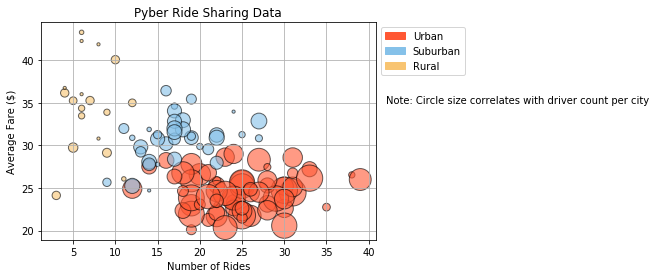

In [3]:
# Take that super sweet data frame i spent all that time above creating and then turn it into boring lists

x = list(bubble_plot_df["Ride Counts"])
y = list(bubble_plot_df["Average Fare"])
z = list(bubble_plot_df["driver_count"])
color_list = list(bubble_plot_df["type"])

#the driver count circles are gonna be super tiny so I'm going to scale them
#check out this fancy code......

z[:] = [x * 10 for x in z]

# copy and paste this Function i found on the internet to map the colors as a list from the input list of x variables
#in some academic circles, this would be considered plagarism, but not here!!! 
#but this is more captain jack sparrow, i didn't steal your ship, simply borrowed it

def pltcolor(lst):
    cols=[]
    for l in lst:
        if l=="Urban":
            cols.append("#FF5733")
        elif l=="Suburban":
            cols.append("#85C1E9")
        else:
            cols.append("#F8C471")
    return cols

# Create the colors list using the function above
colors=pltcolor(color_list)
labels = ["Urban","Suburban","Rural"]
# plotty plot plot plot

plt.scatter(x, y, s=z*2000, c=colors, alpha = 0.6, edgecolors="black", linewidth=1)
 
# Add titles (main and on axis)
plt.xlabel("Number of Rides")
plt.ylabel("Average Fare ($)")
plt.title("Pyber Ride Sharing Data")
plt.grid(True)

#I only plotted one time so I have to fudge my legend...but i'm cool not spending more time on this

urban_patch = mpatches.Patch(color="#FF5733", label="Urban")
suburban_patch = mpatches.Patch(color="#85C1E9", label="Suburban")
rural_patch = mpatches.Patch(color="#F8C471", label="Rural")
plt.legend(handles=[urban_patch, suburban_patch, rural_patch], loc="upper left", bbox_to_anchor=(1,1))


textstr = "Note: Circle size correlates with driver count per city"
plt.text(42, 35, textstr, fontsize=10)
plt.savefig("ride_sharing_bubble_plot.png", dpi=100, bbox_inches="tight")
plt.show()



## Total Fares by City Type

type
Rural        4327.93
Suburban    19356.33
Urban       39854.38
Name: fare, dtype: float64


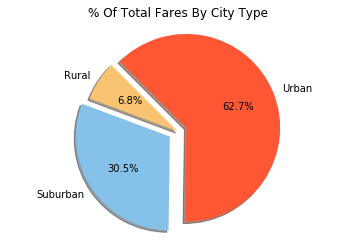

In [4]:
# Calculate Type Percents
# Oh man, should i do this the easy way or the fancy way?
total_fares = merged_df["fare"].sum()

#Groupon seems like a good concept, but one time i bought trapeze lessons and it expired before I could find a good
#day to go and use it, and i just ended up losing my money, but it still sounds like a fun time, but i realized
#it wasn't worth buying the groupon in advance.  If i choose to take trapeze lessons in the future, i will just pay full price
#and do it at my own convenience.  Anyways, I'm going to groupon this dataframe.

fares = merged_df.groupby("type")["fare"].sum()
print(fares)

#told you i don't like groupons, so I'm going to make the series into a list
fares_list = fares.tolist()



#fancy math stuff to get the percentages
fares_list[:] == [fares / total_fares * 100]


# Build Pie Chart
labels = ["Rural", "Suburban", "Urban"]
colors = ["#F8C471", "#85C1E9", "#FF5733"]
explode = (0, 0.1, 0.1)
plt.title("% Of Total Fares By City Type")
plt.pie(fares_list, explode=explode, labels=labels, colors=colors, autopct="%1.1f%%", shadow=True, startangle=135)
plt.axis("equal")
plt.savefig("percent_fares_by_city_type.png", dpi=100)
plt.show()




## Total Rides by City Type

2375
type
Rural        125
Suburban     625
Urban       1625
Name: ride_id, dtype: int64


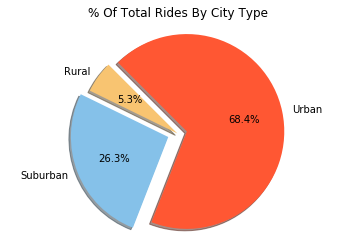

In [5]:
# Calculate Ride Percents
total_rides = merged_df["ride_id"].count()
print(total_rides)

#same groupon, different field
rides = merged_df.groupby("type")["ride_id"].count()
print(rides)

#un-groupon
rides_list = rides.tolist()



#more fancy math stuff to get the percentages
rides_list[:] == [rides / total_rides * 100]


# Build Pie Chart
labels = ["Rural", "Suburban", "Urban"]
colors = ["#F8C471", "#85C1E9", "#FF5733"]
explode = (0, 0.1, 0.1)
plt.title("% Of Total Rides By City Type")
plt.pie(rides_list, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=135)
plt.axis("equal")
plt.savefig("percent_rides_by_city_type.png", dpi=100)
plt.show()


## Total Drivers by City Type

2375
type
Rural         78
Suburban     490
Urban       2405
Name: driver_count, dtype: int64


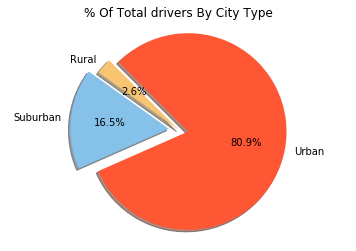

In [6]:
# Calculate Driver counts and stuff

#i guess sum should work.....mean should work too since there's only one value.... can you use .value()??  
#I don't really feel like googling it
total_drivers = bubble_plot_df_starter["driver_count"].sum()
print(total_rides)

#mean mugging this time......
drivers = bubble_plot_df_starter.groupby("type")["driver_count"].sum()
print(drivers)

#un-groupon
drivers_list = drivers.tolist()



#more fancy math stuff to get the percentages
drivers_list[:] == [drivers / total_drivers * 100]


# Build Pie Chart
labels = ["Rural", "Suburban", "Urban"]
colors = ["#F8C471", "#85C1E9", "#FF5733"]
explode = (0, 0.1, 0.1)
plt.title("% Of Total drivers By City Type")
plt.pie(drivers_list, explode=explode, labels=labels, colors=colors, autopct="%1.1f%%", shadow=True, startangle=135)
plt.axis("equal")
plt.savefig("percent_drivers_by_city_type.png", dpi=100)
plt.show()
